# One and two electron Hamiltonian

This model is valid for a double-dot system tuned to the transition from (1,0) to (0,1) or with two electrons for (1,1) to (2,0).

Author: Pieter Eendebak (pieter.eendebak@gmail.com), Bruno Buijtendorp (brunobuijtendorp@gmail.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
sp.init_printing(use_latex='latex')

## One electron Hamiltonian

Define 1-electron double dot Hamiltonian
e is detuning, $t$ is tunnel coupling. The basis we work in is (1,0) and (0,1).

In [2]:
e, t = sp.symbols('e t')
H = sp.Matrix([[e/2, t],[t, -e/2]])
sp.pprint(H)

#%% Get normalized eigenvectors and eigenvalues
eigvec_min = H.eigenvects()[0][2][0].normalized() 
eigval_min = H.eigenvects()[0][0]

eigvec_plus = H.eigenvects()[1][2][0].normalized() 
eigval_plus = H.eigenvects()[1][0]

#%% Lambdify eigenvalues to make them numerical functions of e and t (nicer plotting)
eigval_min_func = sp.lambdify((e,t), eigval_min , 'numpy')
eigval_plus_func = sp.lambdify((e,t), eigval_plus, 'numpy')

#%% Plot energy levels
t_value = 1
plot_x_limit = 5
Npoints_x = 1000

⎡e     ⎤
⎢─   t ⎥
⎢2     ⎥
⎢      ⎥
⎢   -e ⎥
⎢t  ───⎥
⎣    2 ⎦


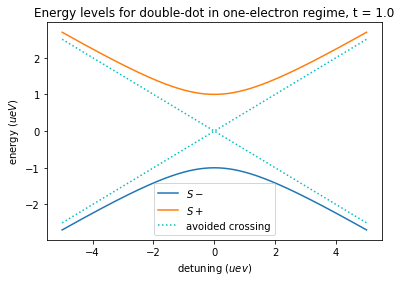

In [3]:
erange = np.linspace(-plot_x_limit, plot_x_limit, Npoints_x)
levelfig, levelax = plt.subplots()
levelax.plot(erange, eigval_min_func(erange , t_value), label='$S-$')
levelax.plot(erange, eigval_plus_func(erange, t_value), label ='$S+$')
levelax.set_title('Energy levels for double-dot in one-electron regime, t = %.1f' % t_value)
plt.plot(erange, erange/2, ':c', label='avoided crossing')
plt.plot(erange, -erange/2, ':c')
plt.legend()
levelax.set_xlabel('detuning $(uev)$')
levelax.set_ylabel('energy $(ueV)$')
_=plt.axis('tight')

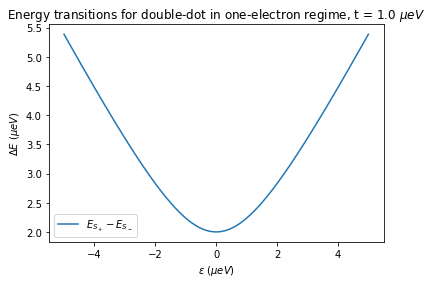

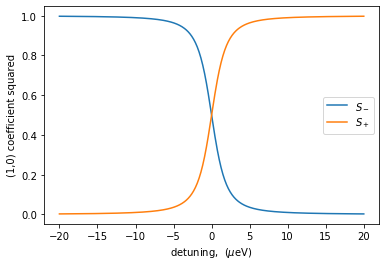

In [4]:
#%% Plot energy level differences
SminS = eigval_plus_func(erange , t_value) - eigval_min_func(erange, t_value)

plt.figure()
plt.plot(erange, SminS, label='$E_{S_+} - E_{S_-}$')
plt.title('Energy transitions for double-dot in one-electron regime, t = %.1f $\mu eV$' % (t_value))
plt.legend()
plt.ylabel('$\Delta E$ $ (\mu eV)$')
plt.xlabel('$\epsilon$ $ (\mu eV)$')

#%% Get S(1,0) component of eigenvectors
eigcomp_min = eigvec_min[0]
eigcomp_plus = eigvec_plus[0]

#%% Plot S(1,0) components squared (probabilities) of eigenvectors as function of detuning
t_value = 1
erange = np.linspace(-20,20,500)
plot_x_limit = 20

# Lambdify eigenvector components to make them functions of e and t
eigcompmin_func = sp.lambdify((e,t), eigcomp_min , 'numpy')
eigcompplus_func = sp.lambdify((e,t), eigcomp_plus, 'numpy')

fig2, ax2 = plt.subplots()
ax2.plot(erange,eigcompmin_func(erange, t_value)**2, label='$S_-$')
ax2.plot(erange,eigcompplus_func(erange, t_value)**2, label='$S_+$')
ax2.set_xlabel('detuning,  ($\mu$eV)')
ax2.set_ylabel('(1,0) coefficient squared')
_=plt.legend()

## Two-electron Hamiltonian

Define 2-electron double dot Hamiltonian
e is detuning, t is tunnel coupling. The basis we work in is: {S(2,0), S(1,1), T(1,1)}

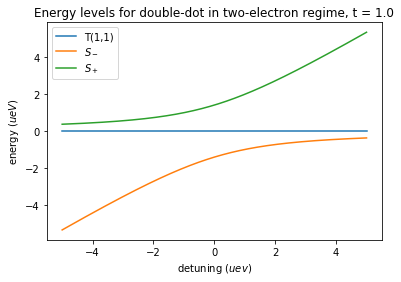

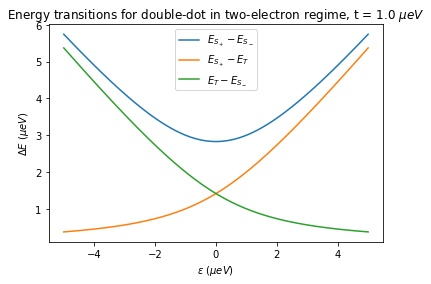

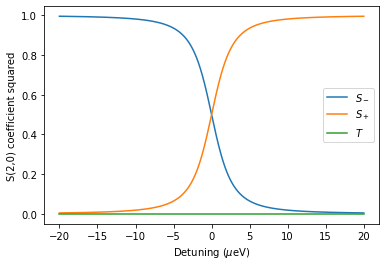

In [5]:
e, t = sp.symbols('e t')
# Basis: {S(2,0), S(1,1), T(1,1)}
H = sp.Matrix([[e, sp.sqrt(2)*t, 0],[sp.sqrt(2)*t, 0, 0],[0, 0, 0]])

#%% Get normalized eigenvectors and eigenvalues
eigvec_min = H.eigenvects()[1][2][0].normalized() 
eigval_min = H.eigenvects()[1][0]

eigvec_plus = H.eigenvects()[2][2][0].normalized() 
eigval_plus = H.eigenvects()[2][0]

eigvec_T = H.eigenvects()[0][2][0].normalized() 
eigval_T = H.eigenvects()[0][0]

#%% Lambdify eigenvalues to make them numerical functions of e and t (nicer plotting)
eigval_min_func = sp.lambdify((e,t), eigval_min , 'numpy')
eigval_plus_func = sp.lambdify((e,t), eigval_plus, 'numpy')

#%% Plot energy levels
t_value = 1
plot_x_limit = 5
Npoints_x = 1000

erange = np.linspace(-plot_x_limit, plot_x_limit, Npoints_x)
levelfig, levelax = plt.subplots()
levelax.plot(erange, [eigval_T]*len(erange), label='T(1,1)')
levelax.plot(erange, eigval_min_func(erange , t_value), label='$S_-$')
levelax.plot(erange, eigval_plus_func(erange, t_value), label ='$S_+$')
levelax.set_title('Energy levels for double-dot in two-electron regime, t = %.1f' % t_value)
plt.legend()
levelax.set_xlabel('detuning $(uev)$')
levelax.set_ylabel('energy $(ueV)$')
plt.axis('tight')

#%% Plot energy level differences
SminS = eigval_plus_func(erange , t_value) - eigval_min_func(erange, t_value)
S20minT = eigval_plus_func(erange, t_value)
TminS11 = -eigval_min_func(erange, t_value) 

plt.figure()
plt.plot(erange, SminS, label='$E_{S_+} - E_{S_-}$')
plt.plot(erange, S20minT, label = '$E_{S_+} - E_T$')
plt.plot(erange, TminS11, label = '$E_T - E_{S_-}$')
plt.title('Energy transitions for double-dot in two-electron regime, t = %.1f $\mu eV$' % (t_value))
plt.legend()
plt.ylabel('$\Delta E$ $ (\mu eV)$')
plt.xlabel('$\epsilon$ $ (\mu eV)$')

#%% Get S(2,0) component of eigenvectors
eigcomp_min = eigvec_min[0]
eigcomp_plus = eigvec_plus[0]
eigcomp_T = eigvec_T[0]

#%% Plot S(2,0) components squared (probabilities) of eigenvectors as function of detuning
t_value = 1
erange = np.linspace(-20,20,500)
plot_x_limit = 20

# Lambdify eigenvector components to make them functions of e and t
eigcompmin_func = sp.lambdify((e,t), eigcomp_min , 'numpy')
eigcompplus_func = sp.lambdify((e,t), eigcomp_plus, 'numpy')

fig2, ax2 = plt.subplots()
ax2.plot(erange,eigcompmin_func(erange, t_value)**2, label='$S_-$')
ax2.plot(erange,eigcompplus_func(erange, t_value)**2, label='$S_+$')
ax2.plot(erange,[eigcomp_T]*len(erange), label='$T$')
ax2.set_xlabel('Detuning ($\mu$eV)')
ax2.set_ylabel('S(2,0) coefficient squared')
_=plt.legend()